In [8]:
# Import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Read the dataset
dataset = pd.read_csv('Autism data.csv')

In [10]:
# Understaning the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [11]:
# age column contains some values with unacceptable data type so handling this column specificaly
dataset['age'].value_counts()

21     49
20     46
23     37
22     37
19     35
24     34
27     31
18     31
30     30
26     28
25     27
29     27
28     24
31     21
17     18
32     18
35     17
37     17
33     16
40     16
42     15
36     13
38     12
34     12
43     11
44     10
47      8
39      7
55      6
53      6
46      6
50      5
52      5
48      4
45      4
49      3
41      3
54      2
58      2
?       2
56      2
61      2
59      1
64      1
60      1
383     1
51      1
Name: age, dtype: int64

In [12]:
dataset.drop(dataset.loc[dataset['age']=='?'].index, inplace=True)

In [13]:
# 1) no null values are present
# 2) I only need to perform encoding in many columns

In [14]:
dataset

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,'18 and more',Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,'18 and more',Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7,'18 and more',?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,'South Asian',no,no,Pakistan,no,6,'18 and more',Self,NO


In [15]:
dataset['ethnicity'].unique()

array(['White-European', 'Latino', '?', 'Others', 'Black', 'Asian',
       "'Middle Eastern '", 'Pasifika', "'South Asian'", 'Hispanic',
       'Turkish', 'others'], dtype=object)

In [16]:
dataset['ethnicity'].value_counts()

White-European       233
Asian                123
?                     93
'Middle Eastern '     92
Black                 43
'South Asian'         36
Others                30
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
others                 1
Name: ethnicity, dtype: int64

In [17]:
dataset['ethnicity'] = dataset['ethnicity'].replace(to_replace="'Middle Eastern'",value = 'Middle Eastern')
dataset['ethnicity'] = dataset['ethnicity'].replace(to_replace="'South Asian'",value = 'South Asian')

In [18]:
ethmap = {'White-European':0, 'Asian':1, 'Middle Eastern':2,
         'Black':3, 'South Asian':4, 'Others':5, 'Latino': 6,
          'Hispanic':7, 'Pasifika':8, 'Turkish':9, 
          'others':5, '?': 0}
# Now I've performed encoding and for the category '?' I've used the value same 0 which is the value of white european
# this is a per frequency encoding technique for '?'
dataset['ethnicity'] = dataset['ethnicity'].map(ethmap)

In [19]:
dataset

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,0.0,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,6.0,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,6.0,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,0.0,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,0.0,no,no,Egypt,no,2,'18 and more',?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,0.0,no,no,Russia,no,7,'18 and more',Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,7.0,no,no,Mexico,no,3,'18 and more',Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,0.0,no,no,Russia,no,7,'18 and more',?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,4.0,no,no,Pakistan,no,6,'18 and more',Self,NO


In [20]:
dataset['ethnicity'].value_counts()

0.0    326
1.0    123
3.0     43
4.0     36
5.0     31
6.0     20
7.0     13
8.0     12
9.0      6
Name: ethnicity, dtype: int64

In [21]:
dataset = dataset.fillna(2)

In [22]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [23]:
# Now the categories gender, jundice and austim conatins only yes and no or f and m (for gender)
# I'll simply perform labelencoding
dataset['gender'] = lb.fit_transform(dataset['gender'])
dataset['jundice'] = lb.fit_transform(dataset['jundice'])
dataset['austim'] = lb.fit_transform(dataset['austim'])

In [24]:
dataset['age_desc'].value_counts()

'18 and more'    702
Name: age_desc, dtype: int64

In [25]:
# Now I'll simply drop the column country as I've already taken ethnicity into consideration 
# used_app_before and relation columns are also of no use to make the desired prediction
# age_desc column shows all patients are 18+ so no variety in the column so we'll remove it as well
dataset = dataset.drop({'contry_of_res', 'used_app_before', 'age_desc', 'relation'}, axis=1)

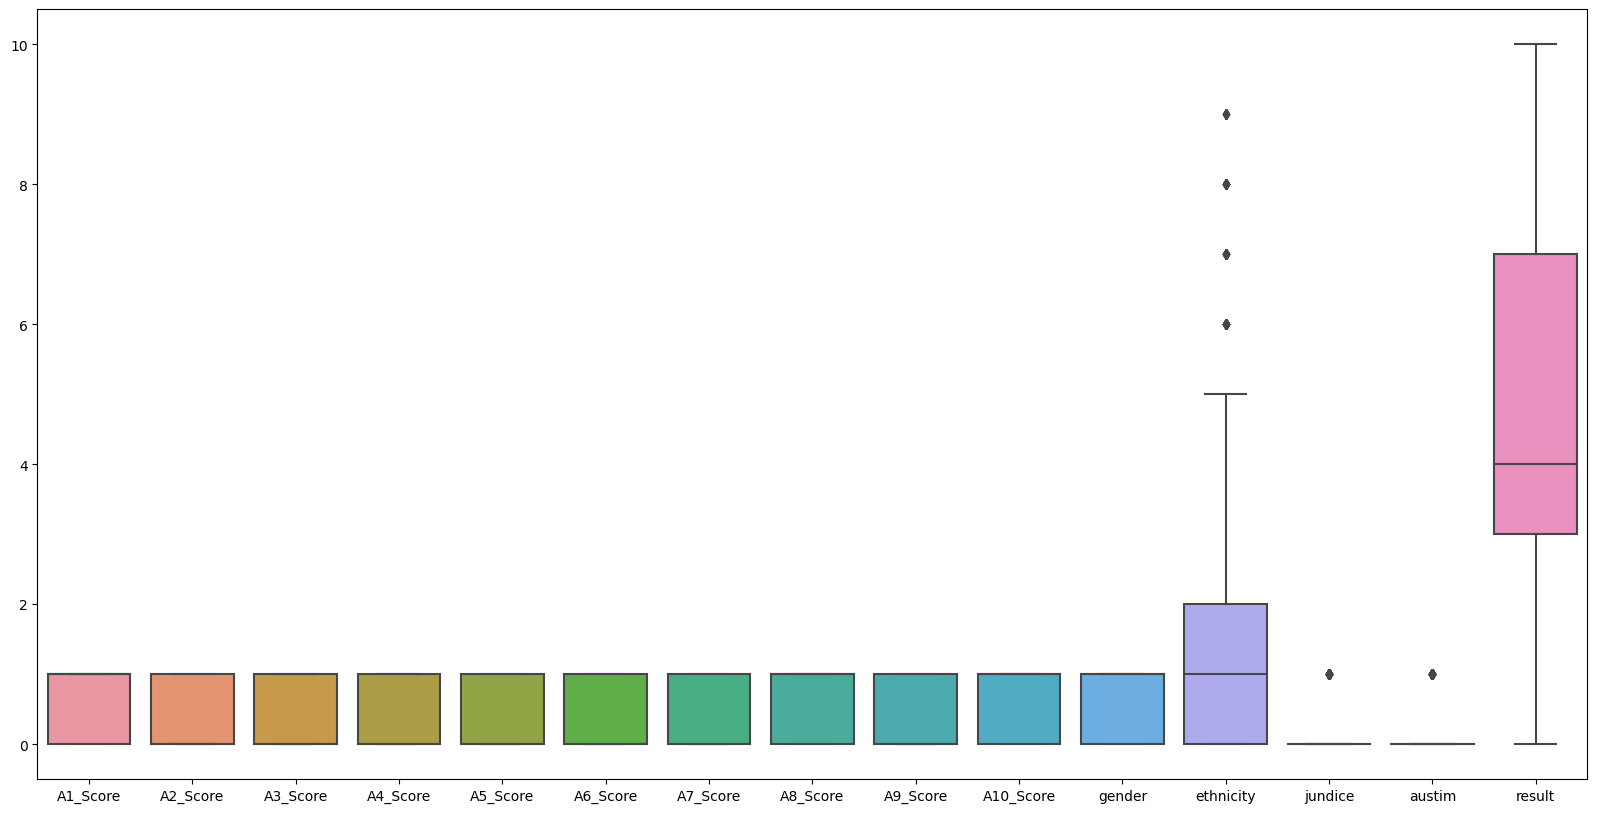

In [26]:
# Checking is there are outliers or not
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(dataset)
plt.show()
# As there are few outliers I've ignored them

In [27]:
dataset['Class/ASD'] = lb.fit_transform(dataset['Class/ASD'])
# cutting the dataset into independent and dependent features

In [28]:
dataset['Class/ASD'].value_counts()   # the dataset is imbalanced

0    513
1    189
Name: Class/ASD, dtype: int64

C:\Users\SUHAS\AppData\Local\Temp\ipykernel_15716\80415761.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


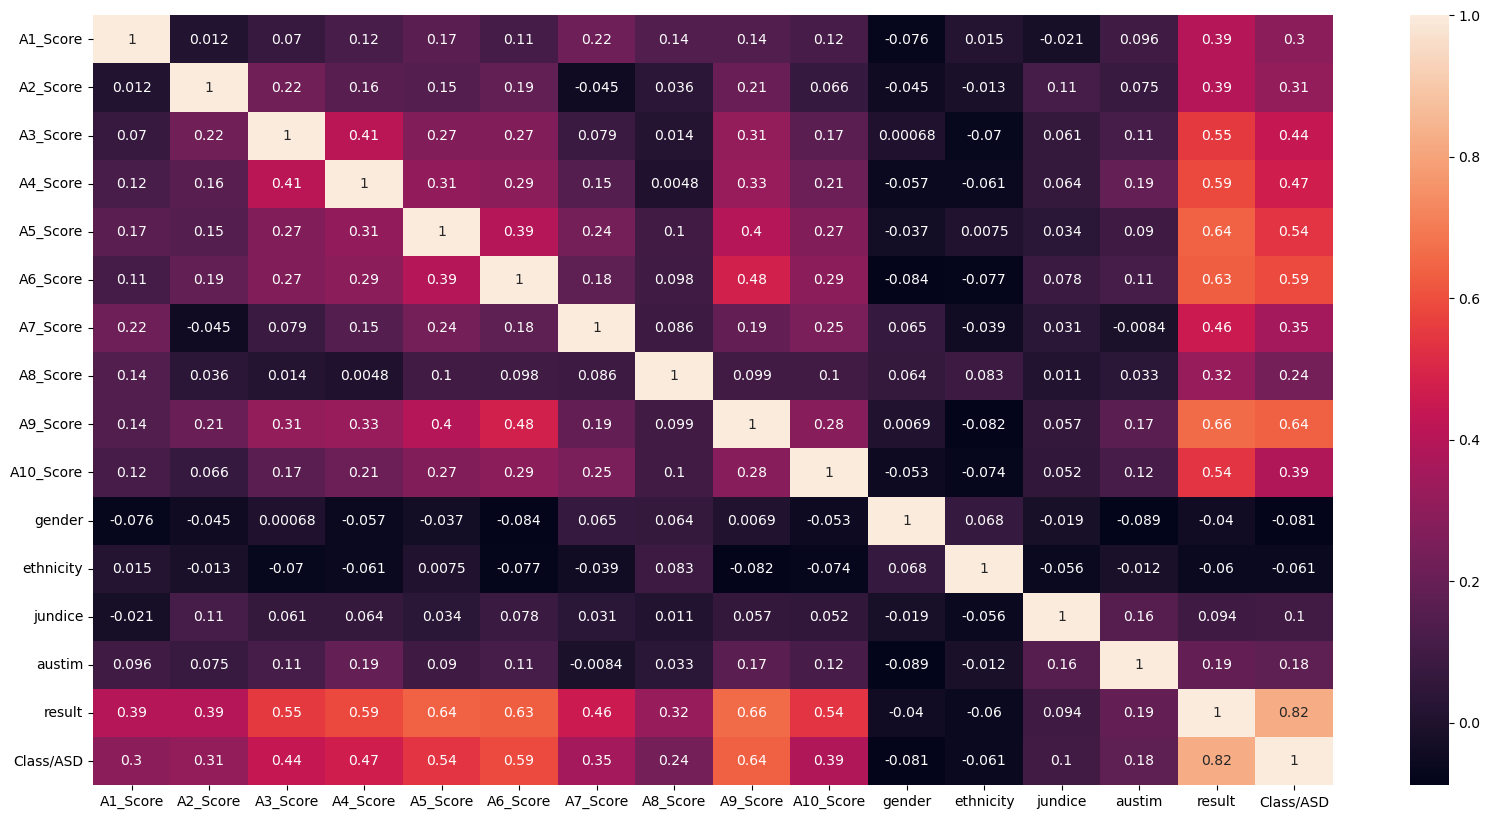

In [29]:
correlation = dataset.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True)
plt.show()

In [30]:
def correlation(dataset,threshold):
    corr = dataset.corr()
    fans = set()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) > threshold:
                col_name = corr.columns[i]
                fans.add(col_name)
    return fans

In [31]:
correlation(dataset, 0.7)
# Now I found out that no columns are highly correlated so we'll simply take all the columns that are now available in 
# the dataset

C:\Users\SUHAS\AppData\Local\Temp\ipykernel_15716\1422960211.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


{'Class/ASD'}

In [45]:
x = dataset.iloc[:,:16].values
y = dataset.iloc[:,16].values

In [46]:
# Splitting the data into train and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

# Cross Validation

In [47]:
# Now Model Selection
# I cannot Use Linear Regression (logistic regression) as no linear relation between features is found
# I cannot Use KNN as it dont perform well on the imbalanced dataset
# I'll put SVM, Random Forest in the Cross-Validation and select the best
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
models = [SVC(C= 10, kernel='rbf', gamma='scale',random_state=None), 
          RandomForestClassifier(n_estimators=50, criterion='gini')]
for model in models:
    cvs = cross_val_score(model,x_train,y_train,cv=10)
#     print(cvs)
    avg_cvs = sum(cvs)/len(cvs)
    print(f"Average cross_val_score of {model} is {avg_cvs}")

Average cross_val_score of SVC(C=10) is 0.9775918367346937
Average cross_val_score of RandomForestClassifier(n_estimators=50) is 1.0


In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 703
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1_Score   702 non-null    int64  
 1   A2_Score   702 non-null    int64  
 2   A3_Score   702 non-null    int64  
 3   A4_Score   702 non-null    int64  
 4   A5_Score   702 non-null    int64  
 5   A6_Score   702 non-null    int64  
 6   A7_Score   702 non-null    int64  
 7   A8_Score   702 non-null    int64  
 8   A9_Score   702 non-null    int64  
 9   A10_Score  702 non-null    int64  
 10  age        702 non-null    object 
 11  gender     702 non-null    int32  
 12  ethnicity  702 non-null    float64
 13  jundice    702 non-null    int32  
 14  austim     702 non-null    int32  
 15  result     702 non-null    int64  
 16  Class/ASD  702 non-null    int32  
dtypes: float64(1), int32(4), int64(11), object(1)
memory usage: 87.8+ KB


Random Forest gives you probability of belonging to class. 
SVM gives you distance to the boundary, you still need to convert it to probability somehow 
if you need probability. For those problems, where SVM applies, it generally performs better than Random Forest.

# Hyper Parameter Tunning

In [49]:
from sklearn.svm import SVC
classifier = SVC()
parameters = [{'C':[1,10,100,2,5],
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'gamma': ['scale']}]
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy')
gs.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 2, 5], 'gamma': ['scale'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             scoring='accuracy')

In [50]:
gs.best_score_

1.0

In [51]:
gs.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [52]:
# I'll select SVM over RadomForest though it doesnt matter both gave same cross val score
# but SVM will do better as it works well on the high dimensional dataset

classifier = SVC(C=1, kernel='linear', gamma='scale')
classifier.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [53]:
y_pred = classifier.predict(x_test)

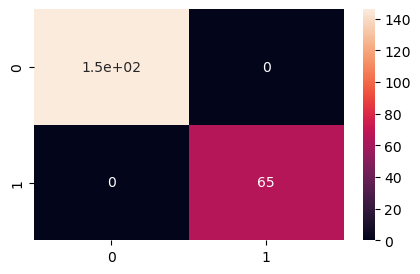

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True)
plt.show()

In [55]:
print(accuracy_score(y_test, y_pred))

1.0
